Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting (use %matplotlib inline).

Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.

## 1. Linear Regression (10 points)
The given file `PricesSales.xls` contains sales data for a commodity along with two variables p1 and p2 which can predict the sales. Given this dataset we need to build linear regression models and visualise their predictions. Use the following steps for training and visualising :

i). Divide the data into a train and test set where train dataset consists of 80% of the entire dataset and test consists of the remaining 20%. (2 points)

ii). Using Ordinary Least Squares from [sklearn](https://scikit-learn.org/stable/modules/linear_model.html), train 3 different Linear Regression models with 1) only p1 as an independent variable (Model-1), 2) only p2 as an independent variable (Model-2), and 3) both [p1, p2] in independent variables (Model-3). (5 points)

iii). Predict the value of sales by using each of the above trained models independently to obtain 3 sets of predictions. (3 points)

iv). Now in three different figures, plot:

  a) predictions obtained using Model-1 vs actual (true) sales.

  b) predictions obtained using Model-2 vs actual (true) sales.

  c) predictions obtained using Model-3 vs actual (true) sales.


Solution

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
dataset = pd.read_excel('C:/Users/I068117/UT_Machine Learning/Regression/PricesSales.xls')
dataset.head()

,p1,p2,Sales
0,5.135670,5.204186,144.487885
1,3.495460,8.059732,637.245239
2,7.275341,11.675979,620.786926
3,4.662816,8.364421,549.007141
4,3.584537,2.150292,20.425419


Divide the data into a train and test set where train dataset consists of 80% of the entire dataset and test consists of the remaining 20%.

In [6]:
# Creating X with all numeric columns and Y as mpg column
X= dataset.drop(['Sales'],axis=1)
y= dataset['Sales']

#Splitting the data-set into test & train dataset to evaluate the model performance 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Using Ordinary Least Squares from sklearn, train 3 different Linear Regression models with 1) only p1 as an independent variable (Model-1), 2) only p2 as an independent variable (Model-2), and 3) both [p1, p2] in independent variables (Model-3).

1) only p1 as an independent variable (Model-1)

In [10]:
lm1 = LinearRegression().fit(X_train['p1'].values.reshape(-1, 1),y_train)
lm2 = LinearRegression().fit(X_train['p2'].values.reshape(-1, 1),y_train)
lm3 = LinearRegression().fit(X_train,y_train)

Predict the value of sales by using each of the above trained models independently to obtain 3 sets of predictions.

In [17]:
Y_test_pred1=lm1.predict(X_test['p1'].values.reshape(-1, 1))
Y_test_pred2=lm2.predict(X_test['p2'].values.reshape(-1, 1))
Y_test_pred3=lm3.predict(X_test)

a) predictions obtained using Model-1 vs actual (true) sales.

b) predictions obtained using Model-2 vs actual (true) sales.

c) predictions obtained using Model-3 vs actual (true) sales.

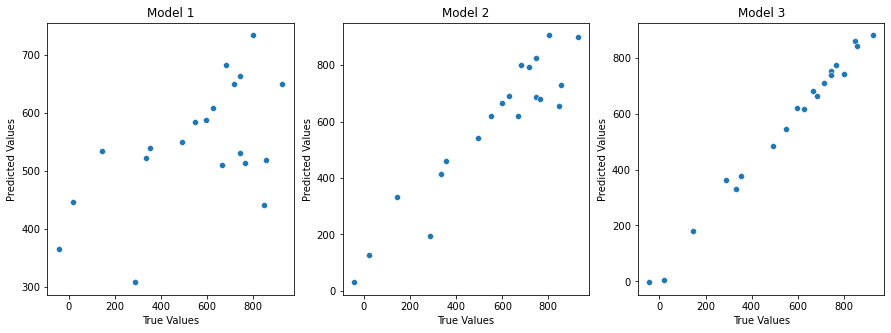

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.scatterplot(x=y_test, y=Y_test_pred1, ax=ax[0])
ax[0].set_xlabel('True Values')
ax[0].set_ylabel('Predicted Values')
ax[0].set_title('Model 1')
sns.scatterplot(x=y_test, y=Y_test_pred2, ax=ax[1])
ax[1].set_xlabel('True Values')
ax[1].set_ylabel('Predicted Values')
ax[1].set_title('Model 2')
sns.scatterplot(x=y_test, y=Y_test_pred3, ax=ax[2])
ax[2].set_xlabel('True Values')
ax[2].set_ylabel('Predicted Values')
ax[2].set_title('Model 3')
plt.show()

Is sales expected to increase if price (P1) is increased?


In [24]:
#Printing the stats summary of our model3
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2704.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           4.71e-72
Time:                        16:17:26   Log-Likelihood:                -380.51
No. Observations:                  80   AIC:                             767.0
Df Residuals:                      77   BIC:                             774.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.7632      9.751     13.308      0.0

Interpretation: Sales & P1 are negatively corelated. Keeping P2 constant, sales will decrease by avg of 99 units for every unit increase in P1.

What do you get if you predict sales as a function of P1 only?

In [27]:
#Printing the stats summary of our model1
X2 = sm.add_constant(X_train['p1'])
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     13.99
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           0.000349
Time:                        16:20:01   Log-Likelihood:                -544.55
No. Observations:                  80   AIC:                             1093.
Df Residuals:                      78   BIC:                             1098.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.1960     74.109      3.322      0.0

Interpretation: Sales & P1 are positively corelated if the model is based only on P1. This is because P1 & P2 are highly corelated and if we don't control for P2, it's effect is felt on the Sales which makes p1 also positivly corelated to sales. This shows that corelation is not casuation